Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 27
         Gradient evaluations: 9
Masa Inicial: 46.51960081990304 kg (93.96959365620414 lbs)
Radio inicial: 31.658702268498264 cm (12.464031083107765 in)
Fuerza final: 22345.75552415337
Posición final: 219.47582030729566
Velocidad final: 14.136581790176962


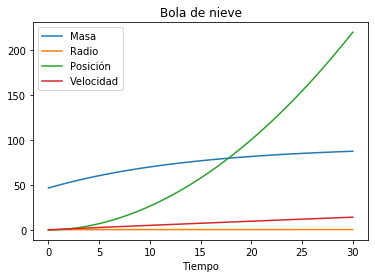

In [2]:
import numpy as np # 
from scipy.integrate import odeint # Integración
from scipy.optimize import minimize # Optimización
import matplotlib.pyplot as plt # Graficación

# Definimos los parámetros del sistema
K0 = 85 # factor de crecimiento 1
beta = 0.07 # factor de crecimiento 2
C_d = 0.3 # Coeficiente de arrastre
g = 9.8 # Gravedad
rho = 350 # Densidad de la nieve
theta = np.radians(5) # Pendiente
rho_a = 0.9 # Densidad del aire

# Condiciones iniciales de la bola de nieve
m0 = 10 # masa inicial
v0 = 0 # Velocidad inicial
r0 = (m0/(4/3.0*np.pi*rho))**(1/3.0) # Radio inicial
s0 = 0 # Posición inicial

# Fuerza deseada
F_d = 25000

# establecemos un intervalo de tiempo par resolver en 30 segundos
t = np.linspace(0,30)

# Esta funcion define las dinamicas de la bola de nieve, la ecuación de movimiento
# y la razon con la que cambias el radio y la masa.
def snowball_dynamics(w,t,p):
    
    # separamos las variables de estado
    M,r,s,v = w
    
    # separamos los parametros
    K0,C_d,g,rho,theta,rho_a,beta = p
    
    # Creamos un arreglo de las cuatro ecuaciones diferenciales definidas en nuestro modelo.
    f = [beta * K0 * np.exp(-beta*t),
         (beta * K0 * np.exp(-beta*t))/(4*np.pi*rho*r**2),
         v,
         (-15*rho_a*C_d)/(56*rho)*1/r*v**2 - 23/7*1/r*beta*K0*np.exp(-beta*t)/(4*np.pi*rho*r**2)*v+5/7*g*np.sin(theta)]
    return f

# Esta es la funcion objetivo de la optimización. 
# Intentará minimizar la salida de esta función cambiando la masa inicial de la bola de nieve.
def objective(m0):
    
    #Cargar parametros
    p = [K0,C_d,g,rho,theta,rho_a,beta]
    
    # Obtenemos el radio inicial a partir de la masa inicial
    r0 = (m0/(4/3.0*np.pi*rho))**(1/3.0)
    
    # Establecemos valores inciales
    w0 = [m0,r0,s0,v0]
    
    # Integramos para 30 segundos
    sol = odeint(snowball_dynamics,w0,t,args=(p,))
    
    # Calculamos la energia cinetica al finalizar la integración
    ke = 0.5 * sol[:,0][-1] * sol[:,3][-1]**2

    # Calculamos la fuerza requerida para detener la bola de nieve dado su radio
    F = ke / sol[:,1][-1]
    
    # Comparamos con la fuerza deseada: Esto debe ser igual a zero cuando hayamos terminado.
    obj = (F - F_d)**2
    
    return obj

# Optimizamos usando las funciones definidas anteriormente
res = minimize(objective,m0,options={'disp':True})  

# Obtenemos la masa inicial optima de la solución anterior
m0_opt = res.x[0]

# Calculamos el radio optimo inicial a partir de la masa
r0_opt = (m0_opt/(4/3.0*np.pi*rho))**(1/3.0)

print('Masa Inicial: ' + str(m0_opt) + ' kg (' + str(m0_opt*2.02) + ' lbs)')
print('Radio inicial: ' + str(r0_opt*100) + ' cm (' + str(r0_opt*39.37) + ' in)')

# Solo para segurarnos que es la respuesta correcta
# Calculamos la fuerza final utilizando las condiciones iniciales optimizadas

# Establecemos condiciones iniciales
w0 = [m0_opt,r0_opt,s0,v0]

# Cargamos los parametros
p = [m0_opt,C_d,g,rho,theta,rho_a,beta]

# Integramos
sol = odeint(snowball_dynamics,w0,t,args=(p,))

# Obtenemos la energia cinetica
ke = 0.5 * sol[:,0][-1] * sol[:,3][-1]**2

# Obtenemos la fuerza final 
F = ke / sol[:,1][-1]
print('Fuerza final: ' + str(F))

# Posición final
print('Posición final: ' + str(sol[:,2][-1]))
print('Velocidad final: ' + str(sol[:,3][-1]))

# Y unas f¿graficas de las condiciones de la bola de nieve a lo largo del experimento
plt.figure()
plt.plot(t,sol[:,0],label='Masa')
plt.plot(t,sol[:,1],label='Radio')
plt.plot(t,sol[:,2],label='Posición')
plt.plot(t,sol[:,3],label='Velocidad')
plt.title('Bola de nieve')
plt.xlabel('Tiempo')
plt.legend()